# Chapter 8. Data Wrangling: Join, Combine, and Reshape

## 8.1 Hierarchical Indexing

In [4]:
import pandas as pd
import numpy as np

In [6]:
#enables to have multiple index levels on an axis

data = pd.Series(np.random.uniform(size=9),
                 index=[["a", "a", "a", "b", "b", "c", "c", "d", "d"],
                        [1, 2, 3, 1, 3, 1, 2, 2, 3]])

data

a  1    0.867950
   2    0.429997
   3    0.107076
b  1    0.778937
   3    0.225467
c  1    0.395804
   2    0.453850
d  2    0.024224
   3    0.552873
dtype: float64

In [7]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('d', 2),
            ('d', 3)],
           )

In [8]:
data["b"]

1    0.778937
3    0.225467
dtype: float64

In [9]:
data["b":"c"]

b  1    0.778937
   3    0.225467
c  1    0.395804
   2    0.453850
dtype: float64

In [10]:
data.loc[["b", "d"]]

b  1    0.778937
   3    0.225467
d  2    0.024224
   3    0.552873
dtype: float64

In [11]:
data.loc[:, 2]

a    0.429997
c    0.453850
d    0.024224
dtype: float64

In [13]:
#rearrange data into DataFrame

data.unstack()

,1,2,3
a,0.867950,0.429997,0.107076
b,0.778937,NaN,0.225467
c,0.395804,0.453850,NaN
d,NaN,0.024224,0.552873


In [14]:
#inverse of unstack= stack

data.unstack().stack()

a  1    0.867950
   2    0.429997
   3    0.107076
b  1    0.778937
   3    0.225467
c  1    0.395804
   2    0.453850
d  2    0.024224
   3    0.552873
dtype: float64

In [143]:
frame = pd.DataFrame(np.arange(12).reshape((4, 3)),
                     index=[["a", "a", "b", "b"], [1, 2, 1, 2]],
                     columns=[["Ohio", "Ohio", "Colorado"],
                              ["Green", "Red", "Green"]])

frame

Ohio     Colorado
    Green Red    Green
a 1     0   1        2
  2     3   4        5
b 1     6   7        8
  2     9  10       11

In [144]:
frame.index.names = ["key1", "key2"]

frame.columns.names = ["state", "color"]

frame

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [145]:
# the num. of levels an index has 

frame.index.nlevels

2

In [146]:
frame["Ohio"]

color      Green  Red
key1 key2            
a    1         0    1
     2         3    4
b    1         6    7
     2         9   10

In [147]:
# multiindex can be created by itself and then resused

pd.MultiIndex.from_arrays([["Ohio", "Ohio", "Colorado"],
                          ["Green", "Red", "Green"]],
                          names=["state", "color"])

MultiIndex([(    'Ohio', 'Green'),
            (    'Ohio',   'Red'),
            ('Colorado', 'Green')],
           names=['state', 'color'])

###### 8.1.1 reordering and sorting levels

In [148]:
#rearranging the order of the levels on an axis or sort the data by the values in one specific level

#swaplevel method takes two level numbers or names and returns a new object with the levels interchanged


frame.swaplevel("key1", "key2") #key 자리 변경

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
2    a        3   4        5
1    b        6   7        8
2    b        9  10       11

In [154]:
frame.sort_index(level=0)
#sort_index =>sorts the data lexicographically using all the index levels

state      Ohio     Colorado
color     Green Red    Green
key1 key2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11

In [25]:
frame.swaplevel(0, 1).sort_index(level=0)

state      Ohio     Colorado
color     Green Red    Green
key2 key1                   
1    a        0   1        2
     b        6   7        8
2    a        3   4        5
     b        9  10       11

###### 8.1.2 Summary Statistics by level

In [26]:
frame.groupby(level="key2").sum()

state  Ohio     Colorado
color Green Red    Green
key2                    
1         6   8       10
2        12  14       16

In [27]:
frame.groupby(level="color", axis="columns").sum()

color      Green  Red
key1 key2            
a    1         2    1
     2         8    4
b    1        14    7
     2        20   10

###### 8.1.3 Indexing with a DataFrame's columns

In [28]:
frame = pd.DataFrame({"a": range(7), "b": range(7, 0, -1),
                      "c": ["one", "one", "one", "two", "two",
                            "two", "two"],
                      "d": [0, 1, 2, 0, 1, 2, 3]})

frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [29]:
frame2 = frame.set_index(["c", "d"]) #create a new dataframe using one or more of its columns as index

frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [30]:
#by default, the columns are removed from the dataframe. 

frame.set_index(["c", "d"], drop=False)

a  b    c  d
c   d              
one 0  0  7  one  0
    1  1  6  one  1
    2  2  5  one  2
two 0  3  4  two  0
    1  4  3  two  1
    2  5  2  two  2
    3  6  1  two  3

In [32]:
frame2.reset_index() #opposite of set_index

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


## 8.2 Combining and Merging Datasets

###### 8.2.1 database-style dataframe joins

In [156]:
#pandas.merge 

df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "a", "b"],
                    "data1": pd.Series(range(7), dtype="Int64")})
df2 = pd.DataFrame({"key": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,a,5
6,b,6


In [157]:
df2

,key,data2
0,a,0
1,b,1
2,d,2


In [158]:
pd.merge(df1, df2) #왜 0에도 1??

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [163]:
pd.merge(df1, df2, on="key")

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0


In [39]:
df3 = pd.DataFrame({"lkey": ["b", "b", "a", "c", "a", "a", "b"],
                     "data1": pd.Series(range(7), dtype="Int64")})
df4 = pd.DataFrame({"rkey": ["a", "b", "d"],
                    "data2": pd.Series(range(3), dtype="Int64")})

pd.merge(df3, df4, left_on="lkey", right_on="rkey")              

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [40]:
pd.merge(df1, df2, how="outer") #outer join takes the union of the keys, combining the effect of appluing both left and right joins

,key,data1,data2
0,b,0,1
1,b,1,1
2,b,6,1
3,a,2,0
4,a,4,0
5,a,5,0
6,c,3,<NA>
7,d,<NA>,2


In [41]:
pd.merge(df3, df4, left_on="lkey", right_on="rkey", how="outer")

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0
6,c,3,NaN,<NA>
7,NaN,<NA>,d,2


In [42]:
df1 = pd.DataFrame({"key": ["b", "b", "a", "c", "a", "b"],
                    "data1": pd.Series(range(6), dtype="Int64")})

df2 = pd.DataFrame({"key": ["a", "b", "a", "b", "d"],
                    "data2": pd.Series(range(5), dtype="Int64")})

df1

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [43]:
df2

,key,data2
0,a,0
1,b,1
2,a,2
3,b,3
4,d,4


In [44]:
pd.merge(df1, df2, on="key", how="left")#Use all key combinations found in the left table

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,a,2,0
5,a,2,2
6,c,3,<NA>
7,a,4,0
8,a,4,2
9,b,5,1


In [45]:
pd.merge(df1, df2, how="inner") #Use only the key combinations observed in both tables

,key,data1,data2
0,b,0,1
1,b,0,3
2,b,1,1
3,b,1,3
4,b,5,1
5,b,5,3
6,a,2,0
7,a,2,2
8,a,4,0
9,a,4,2


In [46]:
left = pd.DataFrame({"key1": ["foo", "foo", "bar"],
                     "key2": ["one", "two", "one"],
                     "lval": pd.Series([1, 2, 3], dtype='Int64')})

right = pd.DataFrame({"key1": ["foo", "foo", "bar", "bar"],
                      "key2": ["one", "one", "one", "two"],
                      "rval": pd.Series([4, 5, 6, 7], dtype='Int64')})

pd.merge(left, right, on=["key1", "key2"], how="outer")

,key1,key2,lval,rval
0,foo,one,1,4
1,foo,one,1,5
2,foo,two,2,<NA>
3,bar,one,3,6
4,bar,two,<NA>,7


In [47]:
pd.merge(left, right, on="key1")#?

,key1,key2_x,lval,key2_y,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [48]:
pd.merge(left, right, on="key1", suffixes=("_left", "_right"))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


###### 8.2.2 Merging on Index

In [49]:
left1 = pd.DataFrame({"key": ["a", "b", "a", "a", "b", "c"],
                      "value": pd.Series(range(6), dtype="Int64")})

right1 = pd.DataFrame({"group_val": [3.5, 7]}, index=["a", "b"])

left1

,key,value
0,a,0
1,b,1
2,a,2
3,a,3
4,b,4
5,c,5


In [50]:
right1

,group_val
a,3.5
b,7.0


In [51]:
pd.merge(left1, right1, left_on="key", right_index=True)

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0


In [52]:
pd.merge(left1, right1, left_on="key", right_index=True, how="outer")

,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [55]:
#hierarchically indexed data

lefth = pd.DataFrame({"key1": ["Ohio", "Ohio", "Ohio",
                                "Nevada", "Nevada"],
                      "key2": [2000, 2001, 2002, 2001, 2002],
                      "data": pd.Series(range(5), dtype="Int64")})

righth_index = pd.MultiIndex.from_arrays(
    [
        ["Nevada", "Nevada", "Ohio", "Ohio", "Ohio", "Ohio"],
        [2001, 2000, 2000, 2000, 2001, 2002]
    ]
)
                      

righth = pd.DataFrame({"event1": pd.Series([0, 2, 4, 6, 8, 10], dtype="Int64",
                                           index=righth_index),
                        "event2": pd.Series([1, 3, 5, 7, 9, 11], dtype="Int64",
                                            index=righth_index)})

lefth
                                           

,key1,key2,data
0,Ohio,2000,0
1,Ohio,2001,1
2,Ohio,2002,2
3,Nevada,2001,3
4,Nevada,2002,4


In [56]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [57]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True)

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1


In [58]:
pd.merge(lefth, righth, left_on=["key1", "key2"], right_index=True, how="outer") #handling of duplicate index values

,key1,key2,data,event1,event2
0,Ohio,2000,0,4,5
0,Ohio,2000,0,6,7
1,Ohio,2001,1,8,9
2,Ohio,2002,2,10,11
3,Nevada,2001,3,0,1
4,Nevada,2002,4,<NA>,<NA>
4,Nevada,2000,<NA>,2,3


In [61]:
left2 = pd.DataFrame([[1., 2.], [3., 4.], [5., 6.]],
                     index=["a", "c", "e"],
                     columns=["Ohio", "Nevada"]).astype("Int64")

right2 = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                      index=["b", "c", "d", "e"],
                      columns=["Missouri", "Alabama"]).astype("Int64")

left2

,Ohio,Nevada
a,1,2
c,3,4
e,5,6


In [62]:
right2

,Missouri,Alabama
b,7,8
c,9,10
d,11,12
e,13,14


In [63]:
pd.merge(left2, right2, how="outer", left_index=True, right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [64]:
#join to simplify merging by index
left2.join(right2, how="outer")

,Ohio,Nevada,Missouri,Alabama
a,1,2,<NA>,<NA>
b,<NA>,<NA>,7,8
c,3,4,9,10
d,<NA>,<NA>,11,12
e,5,6,13,14


In [65]:
left1.join(right1, on="key")

,key,value,group_val
0,a,0,3.5
1,b,1,7.0
2,a,2,3.5
3,a,3,3.5
4,b,4,7.0
5,c,5,NaN


In [66]:
another = pd.DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                       index=["a", "c", "e", "f"],
                       columns=["New York", "Oregon"])
another

,New York,Oregon
a,7.0,8.0
c,9.0,10.0
e,11.0,12.0
f,16.0,17.0


In [67]:
left2.join([right2, another])

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0


In [68]:
left2.join([right2, another], how="outer")

,Ohio,Nevada,Missouri,Alabama,New York,Oregon
a,1,2,<NA>,<NA>,7.0,8.0
c,3,4,9,10,9.0,10.0
e,5,6,13,14,11.0,12.0
b,<NA>,<NA>,7,8,NaN,NaN
d,<NA>,<NA>,11,12,NaN,NaN
f,<NA>,<NA>,<NA>,<NA>,16.0,17.0


###### 8.2.3 Concatenating Along an Axis

In [69]:
arr = np.arange(12).reshape((3, 4))

arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [70]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [72]:
s1 = pd.Series([0, 1], index=["a", "b"], dtype="Int64")

s2 = pd.Series([2, 3, 4], index=["c", "d", "e"], dtype="Int64")

s3 = pd.Series([5, 6], index=["f", "g"], dtype="Int64")

In [73]:
s1

a    0
b    1
dtype: Int64

In [74]:
s2

c    2
d    3
e    4
dtype: Int64

In [75]:
s3

f    5
g    6
dtype: Int64

In [76]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: Int64

In [77]:
#By default, pandas.concat works along axis="index", producing another Series. If you pass axis="columns", the result will instead be a DataFrame

pd.concat([s1, s2, s3], axis="columns")

,0,1,2
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [78]:
#intersect by join = "inner"

s4 = pd.concat([s1, s3])

s4

a    0
b    1
f    5
g    6
dtype: Int64

In [79]:
pd.concat([s1, s4], axis="columns")

,0,1
a,0,0
b,1,1
f,<NA>,5
g,<NA>,6


In [80]:
pd.concat([s1, s4], axis="columns", join="inner")

,0,1
a,0,0
b,1,1


In [81]:
# key argument to create a hierarchical index on the concatenation axis

result = pd.concat([s1, s1, s3], keys=["one", "two", "three"])

result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: Int64

In [82]:
result.unstack()

,a,b,f,g
one,0,1,<NA>,<NA>
two,0,1,<NA>,<NA>
three,<NA>,<NA>,5,6


In [83]:
#In the case of combining Series along axis="columns", the keys become the DataFrame column headers

pd.concat([s1, s2, s3], axis="columns", keys=["one", "two", "three"])

,one,two,three
a,0,<NA>,<NA>
b,1,<NA>,<NA>
c,<NA>,2,<NA>
d,<NA>,3,<NA>
e,<NA>,4,<NA>
f,<NA>,<NA>,5
g,<NA>,<NA>,6


In [84]:
df1 = pd.DataFrame(np.arange(6).reshape(3, 2), index=["a", "b", "c"],
                   columns=["one", "two"])

df2 = pd.DataFrame(5 + np.arange(4).reshape(2, 2), index=["a", "c"],
                   columns=["three", "four"])

df1

,one,two
a,0,1
b,2,3
c,4,5


In [85]:
df2

,three,four
a,5,6
c,7,8


In [86]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [87]:
#passing a dictionary objects instead of a list
#=> the dictionary's keys will be used for the keys option

pd.concat({"level1": df1, "level2": df2}, axis="columns")

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [88]:
pd.concat([df1, df2], axis="columns", keys=["level1", "level2"],
          names=["upper", "lower"])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [89]:
df1 = pd.DataFrame(np.random.standard_normal((3, 4)),
                   columns=["a", "b", "c", "d"])

df2 = pd.DataFrame(np.random.standard_normal((2, 3)),
                   columns=["b", "d", "a"])

df1

,a,b,c,d
0,0.032913,-1.325223,-0.969928,-0.346715
1,-1.318880,1.064682,0.473601,2.041580
2,0.335177,1.121957,-0.527448,0.648821


In [90]:
df2

,b,d,a
0,0.774114,0.62452,0.610458
1,-1.812328,0.07637,0.312046


In [91]:
pd.concat([df1, df2], ignore_index=True)

,a,b,c,d
0,0.032913,-1.325223,-0.969928,-0.346715
1,-1.318880,1.064682,0.473601,2.041580
2,0.335177,1.121957,-0.527448,0.648821
3,0.610458,0.774114,NaN,0.624520
4,0.312046,-1.812328,NaN,0.076370


###### 8.2.4 Combining Data with Overlap

In [92]:
a = pd.Series([np.nan, 2.5, 0.0, 3.5, 4.5, np.nan],
              index=["f", "e", "d", "c", "b", "a"])
b = pd.Series([0., np.nan, 2., np.nan, np.nan, 5.],
              index=["a", "b", "c", "d", "e", "f"])

a

f    NaN
e    2.5
d    0.0
c    3.5
b    4.5
a    NaN
dtype: float64

In [93]:
b

a    0.0
b    NaN
c    2.0
d    NaN
e    NaN
f    5.0
dtype: float64

In [94]:
np.where(pd.isna(a), b, a) #whenever values in a are null, values from b are selected, otherwise the non-null values from a are selected.

array([0. , 2.5, 0. , 3.5, 4.5, 5. ])

In [95]:
a.combine_first(b) #line up values by index

a    0.0
b    4.5
c    3.5
d    0.0
e    2.5
f    5.0
dtype: float64

In [96]:
#combine_first does the same thing column by column, so you can think of it as “patching” missing data in the calling object with data from the object you pass
df1 = pd.DataFrame({"a": [1., np.nan, 5., np.nan],
                    "b": [np.nan, 2., np.nan, 6.],
                    "c": range(2, 18, 4)})

df2 = pd.DataFrame({"a": [5., 4., np.nan, 3., 7.],
                    "b": [np.nan, 3., 4., 6., 8.]})


df1

,a,b,c
0,1.0,NaN,2
1,NaN,2.0,6
2,5.0,NaN,10
3,NaN,6.0,14


In [97]:
df2

,a,b
0,5.0,NaN
1,4.0,3.0
2,NaN,4.0
3,3.0,6.0
4,7.0,8.0


In [98]:
df1.combine_first(df2) #df1 우선

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


## 8.3 Reshaping and Pivoting

###### 8.3.1 Reshaping with Hierarchical Indexing

In [99]:
data = pd.DataFrame(np.arange(6).reshape((2, 3)),
                    index=pd.Index(["Ohio", "Colorado"], name="state"),
                    columns=pd.Index(["one", "two", "three"],
                                     name="number"))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [100]:
# stack method pivots the columns into the rows

result = data.stack()

result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [101]:
#rearrange the data back into a dataframe with unstack
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [102]:
result.unstack(level=0)

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [103]:
result.unstack(level="state")

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [104]:
result.unstack(level=1)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [105]:
s1 = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"], dtype="Int64")

s2 = pd.Series([4, 5, 6], index=["c", "d", "e"], dtype="Int64")

data2 = pd.concat([s1, s2], keys=["one", "two"])

data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [106]:
data2.unstack()

,a,b,c,d,e
one,0,1,2,3,<NA>
two,<NA>,<NA>,4,5,6


In [108]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: Int64

In [109]:
data2.unstack().stack(dropna=False) #keep na

one  a       0
     b       1
     c       2
     d       3
     e    <NA>
two  a    <NA>
     b    <NA>
     c       4
     d       5
     e       6
dtype: Int64

In [111]:
#the level unstacked becomes the lowest level in the result

df = pd.DataFrame({"left": result, "right": result + 5},
                  columns=pd.Index(["left", "right"], name="side"))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [112]:
df.unstack(level="state")

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [113]:
#we can indicate the name of the axis to stack

df.unstack(level="state").stack(level="side")

state         Colorado  Ohio
number side                 
one    left          3     0
       right         8     5
two    left          4     1
       right         9     6
three  left          5     2
       right        10     7

###### 8.3.2 Pivoting "Long" to "Wide" Format

In [219]:
data = pd.read_csv("examples/macrodata.csv")

data = data.loc[:, ["year", "quarter", "realgdp", "infl", "unemp"]]

data.head()

,year,quarter,realgdp,infl,unemp
0,1959,1,2710.349,0.00,5.8
1,1959,2,2778.801,2.34,5.1
2,1959,3,2775.488,2.74,5.3
3,1959,4,2785.204,0.27,5.6
4,1960,1,2847.699,2.31,5.2


In [220]:
#periodIndex to combine the year and quarter columns
periods = pd.PeriodIndex(year=data.pop("year"),
                         quarter=data.pop("quarter"),
                         name="date")
#used the pop method on the dataframe => returns a column while deleting it from the dataframe at the same time
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203, freq='Q-DEC')

In [221]:
data.index = periods.to_timestamp("D")

data.head()

,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [222]:
#select a subset of columns and give the columns index the name "item":

data = data.reindex(columns=["realgdp", "infl", "unemp"])

data.columns.name = "item"

data.head()

item,realgdp,infl,unemp
date,,,
1959-01-01,2710.349,0.00,5.8
1959-04-01,2778.801,2.34,5.1
1959-07-01,2775.488,2.74,5.3
1959-10-01,2785.204,0.27,5.6
1960-01-01,2847.699,2.31,5.2


In [223]:
#reshape with stack

long_data = (data.stack()
             .reset_index()
             .rename(columns={0: "value"}))
long_data[:10]

,date,item,value
0,1959-01-01,realgdp,2710.349
1,1959-01-01,infl,0.000
2,1959-01-01,unemp,5.800
3,1959-04-01,realgdp,2778.801
4,1959-04-01,infl,2.340
5,1959-04-01,unemp,5.100
6,1959-07-01,realgdp,2775.488
7,1959-07-01,infl,2.740
8,1959-07-01,unemp,5.300
9,1959-10-01,realgdp,2785.204


In [224]:
pivoted = long_data.pivot(index="date", columns="item",
                          values="value")

pivoted.head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [225]:
long_data["value2"] = np.random.standard_normal(len(long_data))

long_data[:10]

,date,item,value,value2
0,1959-01-01,realgdp,2710.349,1.174788
1,1959-01-01,infl,0.000,1.740758
2,1959-01-01,unemp,5.800,0.569417
3,1959-04-01,realgdp,2778.801,-0.566939
4,1959-04-01,infl,2.340,0.819879
5,1959-04-01,unemp,5.100,0.491597
6,1959-07-01,realgdp,2775.488,-0.051472
7,1959-07-01,infl,2.740,-0.317614
8,1959-07-01,unemp,5.300,-0.435002
9,1959-10-01,realgdp,2785.204,0.612425


In [226]:
pivoted = long_data.pivot(index="date", columns="item")

#pivot is equivalent to creating a hierarchical index using set_index


pivoted.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.740758  1.174788  0.569417
1959-04-01  2.34  2778.801   5.1  0.819879 -0.566939  0.491597
1959-07-01  2.74  2775.488   5.3 -0.317614 -0.051472 -0.435002
1959-10-01  0.27  2785.204   5.6 -1.469686  0.612425  1.863333
1960-01-01  2.31  2847.699   5.2  1.911390  0.359642 -0.566603

In [227]:
pivoted["value"].head()

item,infl,realgdp,unemp
date,,,
1959-01-01,0.00,2710.349,5.8
1959-04-01,2.34,2778.801,5.1
1959-07-01,2.74,2775.488,5.3
1959-10-01,0.27,2785.204,5.6
1960-01-01,2.31,2847.699,5.2


In [228]:
unstacked = long_data.set_index(["date", "item"]).unstack(level="item")

unstacked.head()

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-01-01  0.00  2710.349   5.8  1.740758  1.174788  0.569417
1959-04-01  2.34  2778.801   5.1  0.819879 -0.566939  0.491597
1959-07-01  2.74  2775.488   5.3 -0.317614 -0.051472 -0.435002
1959-10-01  0.27  2785.204   5.6 -1.469686  0.612425  1.863333
1960-01-01  2.31  2847.699   5.2  1.911390  0.359642 -0.566603

###### 8.3.3 Pivoting "Wide" to "Long" Format

In [123]:
df = pd.DataFrame({"key": ["foo", "bar", "baz"],
                   "A": [1, 2, 3],
                   "B": [4, 5, 6],
                   "C": [7, 8, 9]})

df

,key,A,B,C
0,foo,1,4,7
1,bar,2,5,8
2,baz,3,6,9


In [124]:
# the inverse operation to pivot is pandas.melt

melted = pd.melt(df, id_vars="key")# key is the only group indicator

melted

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6
6,foo,C,7
7,bar,C,8
8,baz,C,9


In [126]:
#using pivot to reshape back to the original layout

reshaped = melted.pivot(index="key", columns="variable",
                        values="value")

reshaped

variable,A,B,C
key,,,
bar,2,5,8
baz,3,6,9
foo,1,4,7


In [127]:
reshaped.reset_index()

variable,key,A,B,C
0,bar,2,5,8
1,baz,3,6,9
2,foo,1,4,7


In [128]:
pd.melt(df, id_vars="key", value_vars=["A", "B"])

,key,variable,value
0,foo,A,1
1,bar,A,2
2,baz,A,3
3,foo,B,4
4,bar,B,5
5,baz,B,6


In [129]:
pd.melt(df, value_vars=["A", "B", "C"])

,variable,value
0,A,1
1,A,2
2,A,3
3,B,4
4,B,5
5,B,6
6,C,7
7,C,8
8,C,9


In [130]:
pd.melt(df, value_vars=["key", "A", "B"])

,variable,value
0,key,foo
1,key,bar
2,key,baz
3,A,1
4,A,2
5,A,3
6,B,4
7,B,5
8,B,6


# Chapter 9 Plotting and Visualization

In [164]:
%matplotlib inline

## 9.1 A Brief matplotlib API Primer

In [165]:
import matplotlib.pyplot as plt

In [195]:
data= np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

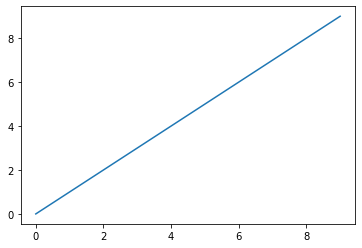

In [196]:
plt.plot(data) #x line => index y=> the number in array

###### 9.1.1 Figures and Subplots

In [206]:
fig = plt.figure() #create new figure

<Figure size 432x288 with 0 Axes>

In [207]:
#figsize guarantees the figure has a certain size and aspect ratio

#need to create one or more subplots since we can't make a plot with a blank figure

ax1 = fig.add_subplot(2, 2, 1) #=> means the figure should be 2x2

In [208]:
ax2 = fig.add_subplot(2, 2, 2)

In [209]:
ax3 = fig.add_subplot(2, 2, 3)

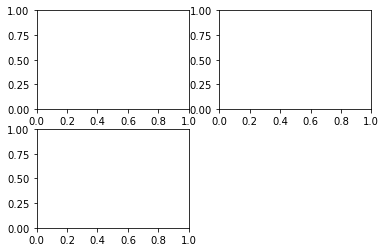

In [210]:
fig

In [211]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black",
         linestyle="dashed");

In [212]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3);
#alpha=0.3 sets the transparency 투명도

ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal
(30));

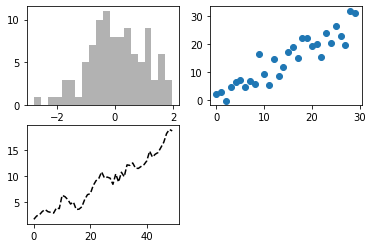

In [213]:
fig

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

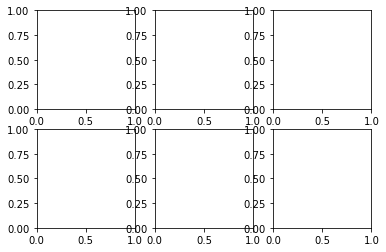

In [214]:
fig, axes = plt.subplots(2, 3) #creates a new figure and returns a NumPy array containing the created subplot objects

axes

In [215]:
axes[0, 1] #위에서 두번째

<AxesSubplot:>

###### Adjusting the spacing around subplots

In [ ]:
#can change the spacing by using subplots_adjust method

subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=None)
#wspace and hspace control the percent of the figure width and height

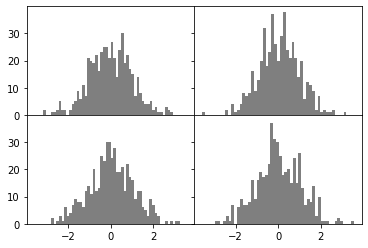

In [218]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)


###### 9.1.2 Colors, Markers, and Line Styles

In [253]:
ax = fig.add_subplot()

<ipython-input-253-732188d83ae1>:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


In [254]:
ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o");

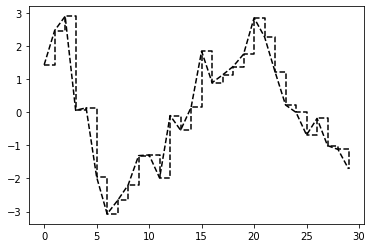

In [265]:
fig = plt.figure()

ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default");
ax.plot(data, color="black", linestyle="dashed",
        drawstyle="steps-post", label="steps-post");

In [266]:
ax.legend() #created plot legend to identify each line

###### 9.1.3 Ticks, Labels, and Legends

In [ ]:
# plot decorations

#xlim, xticks, xticklabels => plot range, tick locations, tick labels

#ax.xlim() returns the current x-axis plotting range

#ax.xlim([0, 10]) sets the x-axis range to 0 to 10

######  Setting the title, axis labels, ticks and tick labels

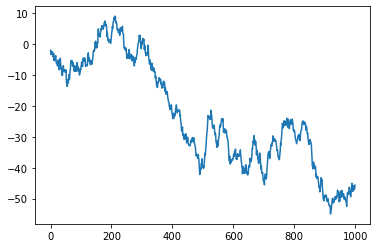

In [275]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum());

In [276]:
#changing x-axis ticks using set_xticks and set_xticklabels

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

labels = ax.set_xticklabels(["one", "two", "three", "four", "five"],
                            rotation=30, fontsize=8)

In [277]:
#set_xlabel gives a name to the x-axis

#set_title is the subplot title

ax.set_xlabel("Stages")

Text(0.5, 3.1999999999999993, 'Stages')

In [278]:
ax.set_title("My first matplotlib plot")

Text(0.5, 1.0, 'My first matplotlib plot')

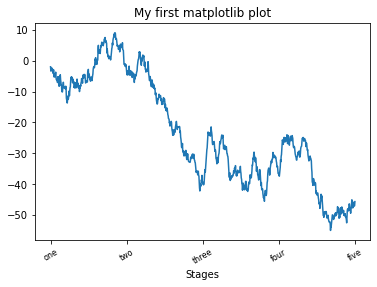

In [280]:
fig

In [281]:
ax.set(title="My first matplotlib plot", xlabel="Stages") #위랑 똑같은 결과

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 17.200000000000003, 'Stages')]

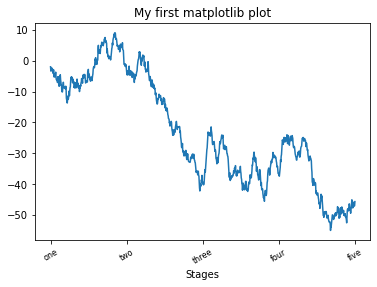

In [282]:
fig

###### Adding legends

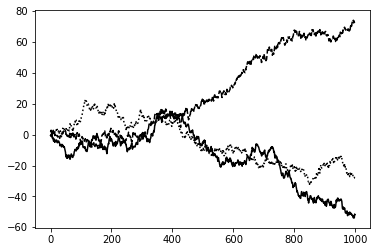

In [289]:
#legends are cirtical element for identifying plot elements

#passing the label argument when adding each piece of the plot

fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one");

ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed",
        label='two');
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted",
        label="three");

In [288]:
ax.legend() #automatically create a legend

###### 9.1.4 Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

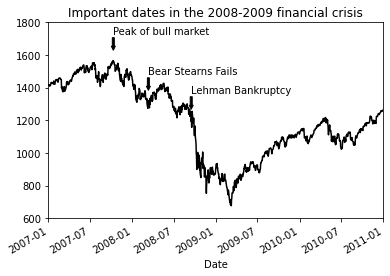

In [293]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("examples/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]


###ax.annotate method can draw labels at the indicated (x,y)
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")

    
    
# Zoom in on 2007-2010


###use set_xlim and set_ylim to manually set the start and end boundaries for the plot rather than usingn matplotlib's default
####ax.set_title adds a main title to the plot
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")


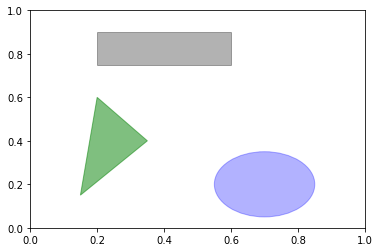

In [294]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color="green", alpha=0.5)

#adding shape to a plot
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)


###### 9.1.5 Saving Plots to File

In [295]:
#saving an SVG version of a figure

fig.savefig("figpath.svg")

In [ ]:
fig.savefig("figpath.png", dpi=400) #dpi controls the dots-per-inch

###### 9.1.6 matplotlib Configuration

In [296]:
plt.rc("figure", figsize=(10, 10)) #setting the 글로벌 default figure size to be 10x10

In [298]:
plt.rc("font", family="monospace", weight="bold", size=8)

## 9.2 Plotting with pandas and seaborn

In [299]:
# seaborn 라이버리: high level statistical graphics lib. built on matplotlib

###### 9.2.1 Line Plots

<AxesSubplot:>

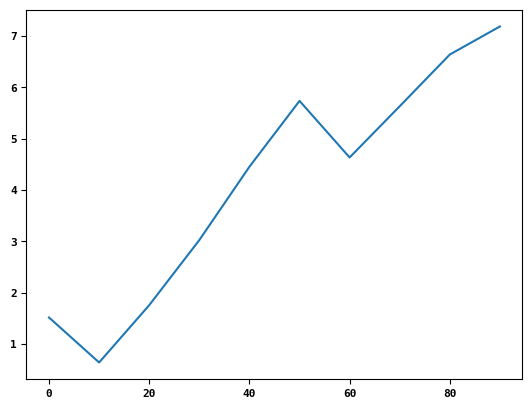

In [300]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0,
 100, 10))

s.plot() #by default makes line plots

<AxesSubplot:>

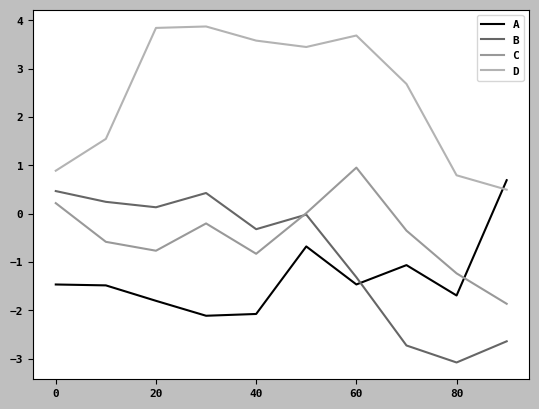

In [306]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))

plt.style.use('grayscale') #switch colorscheme

df.plot() #equivalent to df.plot.line()

In [ ]:
subplots	Plot each DataFrame column in a separate subplot
layouts	2-tuple (rows, columns) providing layout of subplots
sharex	If subplots=True, share the same x-axis, linking ticks and limits
sharey	If subplots=True, share the same y-axis
legend	Add a subplot legend (True by default)
sort_columns	Plot columns in alphabetical order; by default uses existing column order

###### 9.2.2 Bar Plots

<AxesSubplot:>

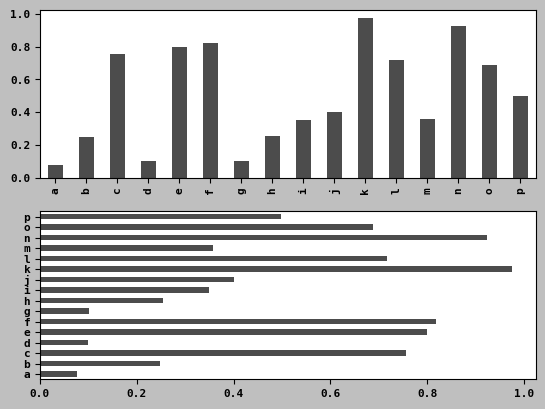

In [309]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7) #vertical bar plot

data.plot.barh(ax=axes[1], color="black", alpha=0.7) #horizontal bar plot

In [310]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df

Genus,A,B,C,D
one,0.515606,0.557110,0.446947,0.389706
two,0.231136,0.197632,0.725154,0.150049
three,0.805720,0.589973,0.141977,0.349977
four,0.134468,0.272706,0.952180,0.785881
five,0.951858,0.562963,0.263892,0.764767
six,0.148925,0.210729,0.607461,0.475088


<AxesSubplot:>

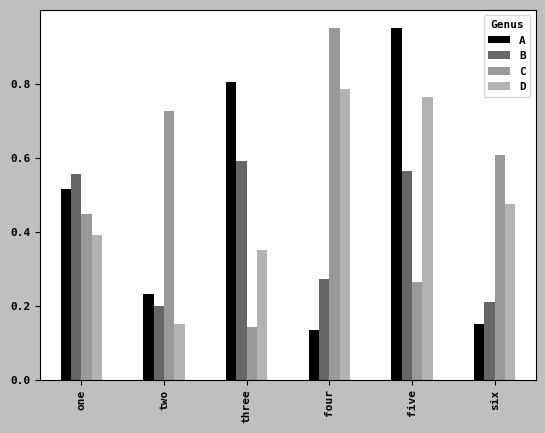

In [311]:
df.plot.bar()

<AxesSubplot:>

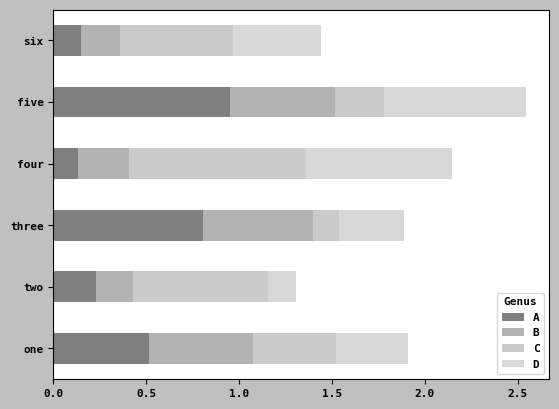

In [312]:
df.plot.barh(stacked=True, alpha=0.5) #stacked bar plot

In [313]:
#ex dataset about restaurant tipping
#목표: make stacked bar plot showing the percentage of data points for each party size for each day
tips = pd.read_csv("examples/tips.csv")

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [314]:
party_counts = pd.crosstab(tips["day"], tips["size"])

party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [315]:
party_counts = party_counts.loc[:, 2:5]

In [317]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"),
                              axis="index")

party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<AxesSubplot:xlabel='day'>

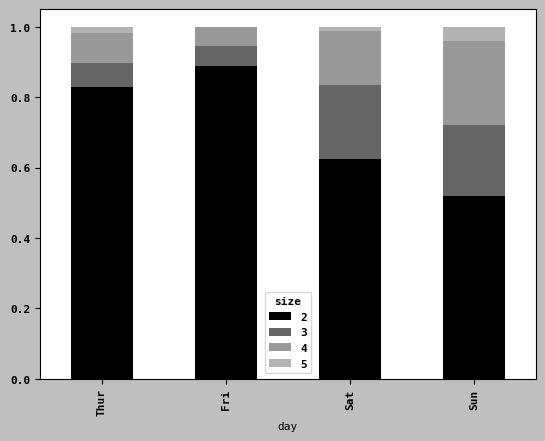

In [318]:
party_pcts.plot.bar(stacked=True)

In [320]:
import seaborn as sns #seaborn is used for data that requires aggregation or summarization before making a plot

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<AxesSubplot:xlabel='tip_pct', ylabel='day'>

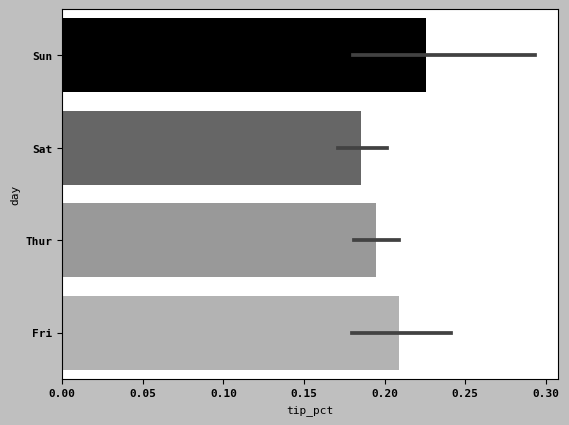

In [321]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

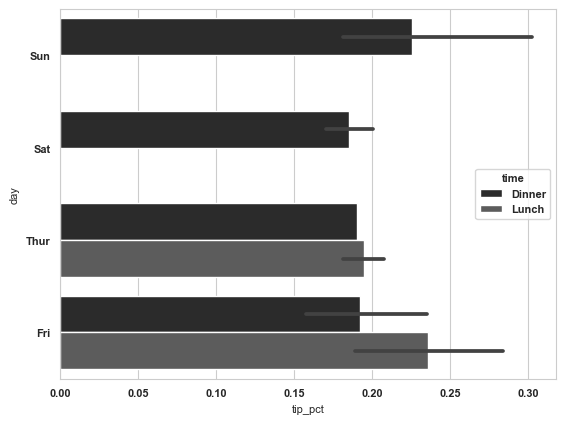

In [329]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [327]:
#switch different plot appearances

sns.set_style("whitegrid")

In [328]:
sns.set_palette("Greys_r") #produces black and white

###### 9.2.3 Histograms and Density Plots

<AxesSubplot:ylabel='Frequency'>

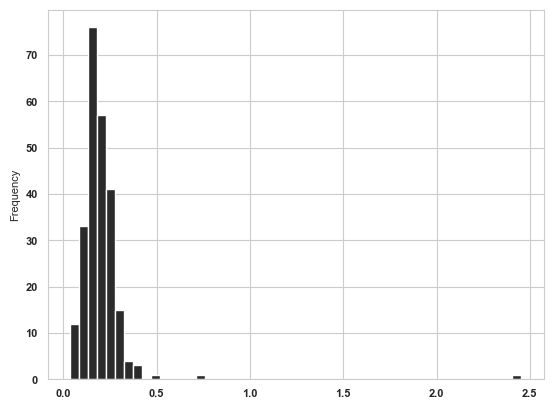

In [330]:
tips["tip_pct"].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

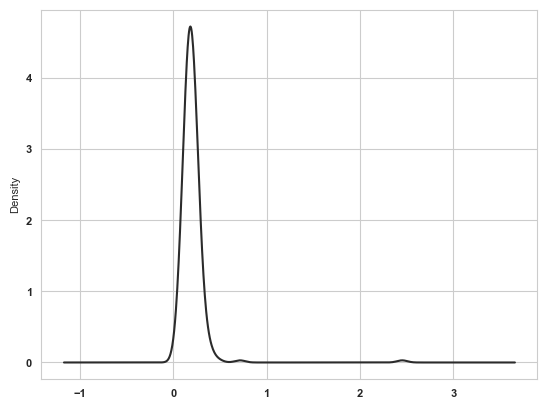

In [331]:
tips["tip_pct"].plot.density()


<AxesSubplot:ylabel='Count'>

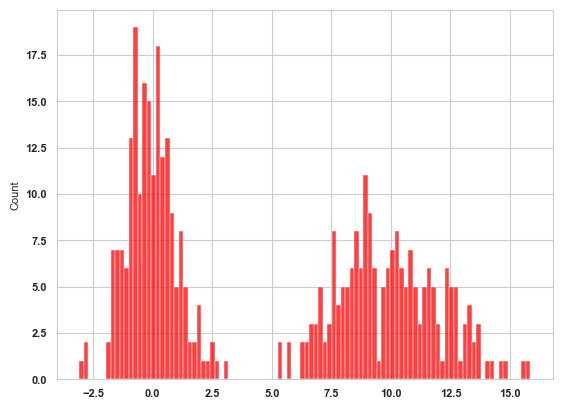

In [413]:
comp1 = np.random.standard_normal(200)

comp2 = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="red")

###### 9.2.4 Scatter or Point Plots

In [333]:
macro = pd.read_csv("examples/macrodata.csv")

data = macro[["cpi", "m1", "tbilrate", "unemp"]]

trans_data = np.log(data).diff().dropna()

trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

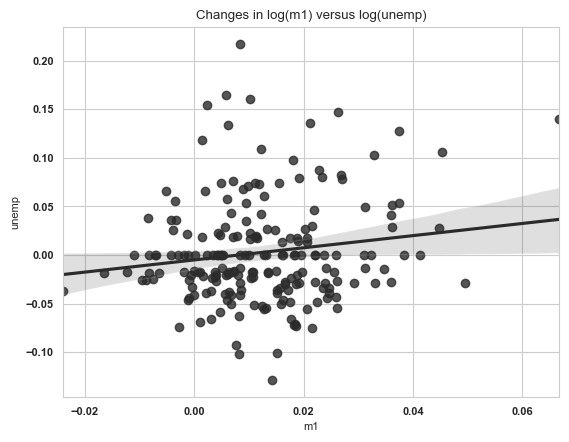

In [412]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data )
plt.title("Changes in log(m1) versus log(unemp)")

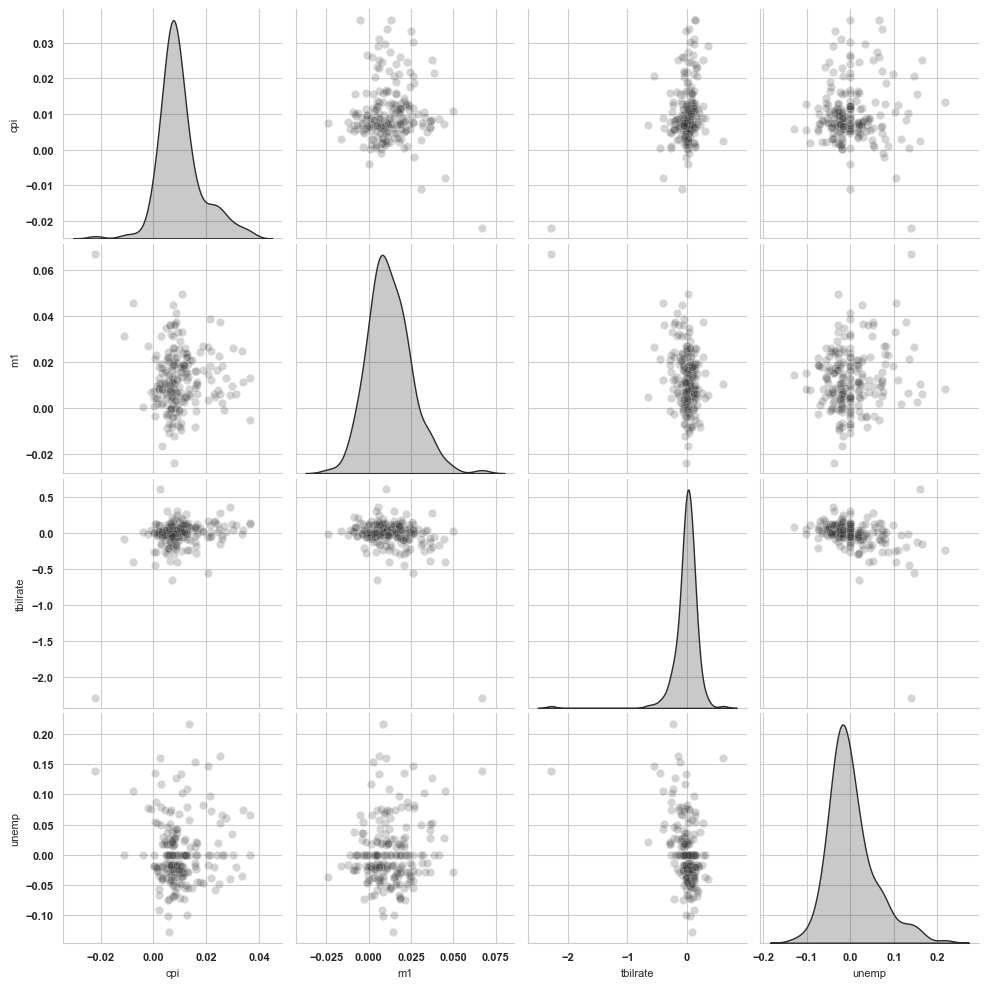

In [339]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

###### 9.2.5 Facet Grids and Categorical Data

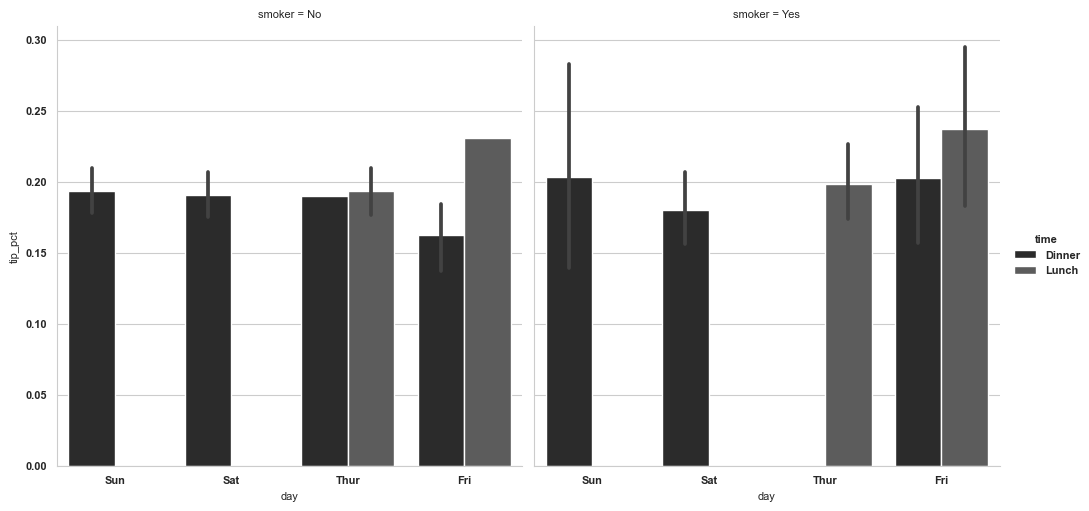

In [340]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])


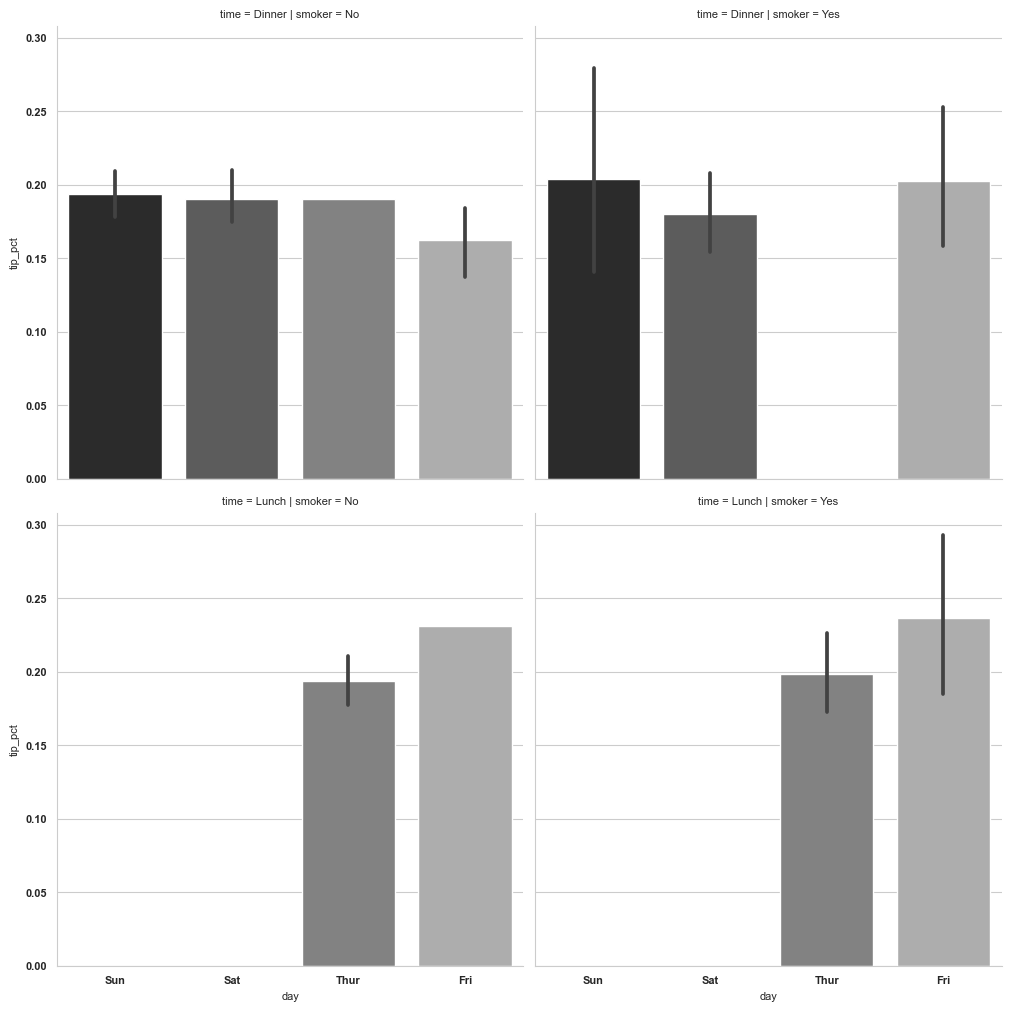

In [341]:
sns.catplot(x="day", y="tip_pct", row="time",
            col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])


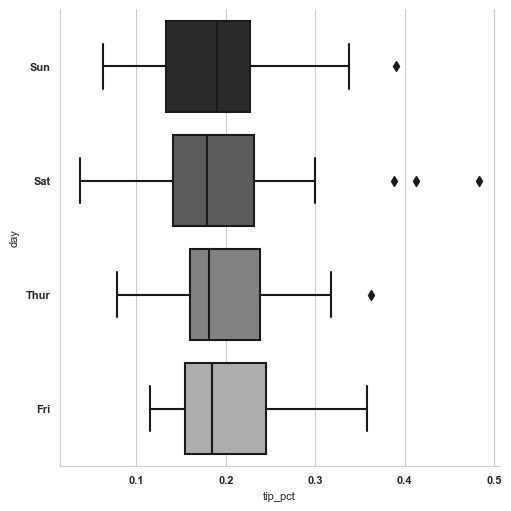

In [342]:
sns.catplot(x="tip_pct", y="day", kind="box",
            data=tips[tips.tip_pct < 0.5])

# Chapter 10 Data Aggregation and Group Operations

In [343]:
import numpy as np

import pandas as pd

## 10.1 How to Think about Group Operations

In [349]:
df = pd.DataFrame({"key1" : ["a", "a", None, "b", "b", "a", None],
                   "key2" : pd.Series([1, 2, 1, 2, 1, None, 1], dtype="Int64"),
                   "data1" : np.random.standard_normal(7),
                   "data2" : np.random.standard_normal(7)})

df

,key1,key2,data1,data2
0,a,1,0.104412,0.520996
1,a,2,0.379083,0.662488
2,None,1,-0.703413,-1.356229
3,b,2,-0.070341,0.325307
4,b,1,0.102401,0.941606
5,a,<NA>,0.517895,0.018374
6,None,1,0.424806,1.624443


In [350]:
grouped = df["data1"].groupby(df["key1"])

grouped

In [351]:
grouped.mean()

key1
a    0.333797
b    0.016030
Name: data1, dtype: float64

In [353]:
means = df["data1"].groupby([df["key1"], df["key2"]]).mean()
means

key1  key2
a     1       0.104412
      2       0.379083
b     1       0.102401
      2      -0.070341
Name: data1, dtype: float64

In [354]:
means.unstack()

key2,1,2
key1,,
a,0.104412,0.379083
b,0.102401,-0.070341


In [355]:
states = np.array(["OH", "CA", "CA", "OH", "OH", "CA", "OH"])

years = [2005, 2005, 2006, 2005, 2006, 2005, 2006]

df["data1"].groupby([states, years]).mean()

CA  2005    0.448489
    2006   -0.703413
OH  2005    0.017036
    2006    0.263604
Name: data1, dtype: float64

In [356]:
df.groupby("key1").mean()

,key2,data1,data2
key1,,,
a,1.5,0.333797,0.400619
b,1.5,0.016030,0.633457


In [357]:
df.groupby("key2").mean()

,data1,data2
key2,,
1,-0.017948,0.432704
2,0.154371,0.493898


In [358]:
df.groupby(["key1", "key2"]).mean()

data1     data2
key1 key2                    
a    1     0.104412  0.520996
     2     0.379083  0.662488
b    1     0.102401  0.941606
     2    -0.070341  0.325307

In [359]:
df.groupby(["key1", "key2"]).size()

key1  key2
a     1       1
      2       1
b     1       1
      2       1
dtype: int64

In [360]:
df.groupby("key1", dropna=False).size()

key1
a      3
b      2
NaN    2
dtype: int64

In [361]:
df.groupby(["key1", "key2"], dropna=False).size()

key1  key2
a     1       1
      2       1
      NaN     1
b     1       1
      2       1
NaN   1       2
dtype: int64

In [362]:
df.groupby("key1").count()

,key2,data1,data2
key1,,,
a,2,3,3
b,2,2,2


###### 10.1.1 Iterating over Groups

In [363]:
for name, group in df.groupby("key1"):
    print(name)
    print(group)

a
  key1  key2     data1     data2
0    a     1  0.104412  0.520996
1    a     2  0.379083  0.662488
5    a  <NA>  0.517895  0.018374
b
  key1  key2     data1     data2
3    b     2 -0.070341  0.325307
4    b     1  0.102401  0.941606


In [364]:
for (k1, k2), group in df.groupby(["key1", "key2"]):
    print((k1, k2))
    print(group)

('a', 1)
  key1  key2     data1     data2
0    a     1  0.104412  0.520996
('a', 2)
  key1  key2     data1     data2
1    a     2  0.379083  0.662488
('b', 1)
  key1  key2     data1     data2
4    b     1  0.102401  0.941606
('b', 2)
  key1  key2     data1     data2
3    b     2 -0.070341  0.325307


In [365]:
pieces = {name: group for name, group in df.groupby("key1")}

pieces["b"]

,key1,key2,data1,data2
3,b,2,-0.070341,0.325307
4,b,1,0.102401,0.941606


In [366]:
grouped = df.groupby({"key1": "key", "key2": "key",
                      "data1": "data", "data2": "data"}, axis="columns")

In [367]:
for group_key, group_values in grouped:
    print(group_key)
    print(group_values)

data
      data1     data2
0  0.104412  0.520996
1  0.379083  0.662488
2 -0.703413 -1.356229
3 -0.070341  0.325307
4  0.102401  0.941606
5  0.517895  0.018374
6  0.424806  1.624443
key
   key1  key2
0     a     1
1     a     2
2  None     1
3     b     2
4     b     1
5     a  <NA>
6  None     1


###### 10.1.2 Selecting a Column or Subset of COlumns

In [368]:
df.groupby(["key1", "key2"])[["data2"]].mean()

data2
key1 key2          
a    1     0.520996
     2     0.662488
b    1     0.941606
     2     0.325307

In [370]:
s_grouped = df.groupby(["key1", "key2"])["data2"]

s_grouped

s_grouped.mean()

key1  key2
a     1       0.520996
      2       0.662488
b     1       0.941606
      2       0.325307
Name: data2, dtype: float64

###### 10.1.3 Grouping with Dictionaries and Series

In [373]:
people = pd.DataFrame(np.random.standard_normal((5, 5)),
                      columns=["a", "b", "c", "d", "e"],
                      index=["Joe", "Steve", "Wanda", "Jill", "Trey"])

people.iloc[2:3, [1, 2]] = np.nan # Add a few NA values

people

,a,b,c,d,e
Joe,2.448805,-0.167476,-0.403998,-1.144590,-0.098916
Steve,1.381462,1.029154,0.192809,-0.499134,0.821060
Wanda,-1.331669,NaN,NaN,-1.411786,-0.424027
Jill,-0.231036,0.289701,-0.310056,-1.685206,0.543363
Trey,-0.711048,-1.018324,-0.492064,-0.590121,-1.653223


In [374]:
mapping = {"a": "red", "b": "red", "c": "blue",
           "d": "blue", "e": "red", "f" : "orange"}

In [375]:
by_column = people.groupby(mapping, axis="columns")

by_column.sum()

,blue,red
Joe,-1.548588,2.182413
Steve,-0.306324,3.231676
Wanda,-1.411786,-1.755696
Jill,-1.995262,0.602028
Trey,-1.082185,-3.382594


In [376]:
map_series = pd.Series(mapping)

map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [377]:
people.groupby(map_series, axis="columns").count()

,blue,red
Joe,2,3
Steve,2,3
Wanda,1,2
Jill,2,3
Trey,2,3


###### 10.1.4 Grouping with Functions

In [378]:
people.groupby(len).sum()

,a,b,c,d,e
3,2.448805,-0.167476,-0.403998,-1.144590,-0.098916
4,-0.942084,-0.728623,-0.802120,-2.275328,-1.109860
5,0.049792,1.029154,0.192809,-1.910919,0.397033


In [380]:
key_list = ["one", "one", "one", "two", "two"]

people.groupby([len, key_list]).min()

,,a,b,c,d,e
3,one,2.448805,-0.167476,-0.403998,-1.144590,-0.098916
4,two,-0.711048,-1.018324,-0.492064,-1.685206,-1.653223
5,one,-1.331669,1.029154,0.192809,-1.411786,-0.424027


###### 10.1.5 Grouping by Index Levels

In [382]:
columns = pd.MultiIndex.from_arrays([["US", "US", "US", "JP", "JP"],
                                     [1, 3, 5, 1, 3]],
                                    names=["cty", "tenor"])

hier_df = pd.DataFrame(np.random.standard_normal((4, 5)), columns=columns)

hier_df

cty          US                            JP          
tenor         1         3         5         1         3
0      0.941324  0.787922  0.934196  0.677461 -0.809154
1      0.328248  2.599254  0.234818  1.617634 -1.092304
2      0.860845  1.062023 -0.140805 -1.563292  0.016168
3      1.153469  0.816692 -0.913295 -0.628904  0.166882

In [383]:
hier_df.groupby(level="cty", axis="columns").count()

cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 10.2 Data Aggregation

In [384]:
df

,key1,key2,data1,data2
0,a,1,0.104412,0.520996
1,a,2,0.379083,0.662488
2,None,1,-0.703413,-1.356229
3,b,2,-0.070341,0.325307
4,b,1,0.102401,0.941606
5,a,<NA>,0.517895,0.018374
6,None,1,0.424806,1.624443


In [386]:
grouped = df.groupby("key1")

grouped["data1"].nsmallest(2)

key1   
a     0    0.104412
      1    0.379083
b     3   -0.070341
      4    0.102401
Name: data1, dtype: float64

In [388]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

grouped.agg(peak_to_peak)

,key2,data1,data2
key1,,,
a,1,0.413483,0.644114
b,1,0.172742,0.616299


In [389]:
grouped.describe()

key2                                           data1            ...  \
     count mean       std  min   25%  50%   75%  max count      mean  ...   
key1                                                                  ...   
a      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   3.0  0.333797  ...   
b      2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.016030  ...   

                         data2                                          \
           75%       max count      mean       std       min       25%   
key1                                                                     
a     0.448489  0.517895   3.0  0.400619  0.338509  0.018374  0.269685   
b     0.059216  0.102401   2.0  0.633457  0.435789  0.325307  0.479382   

                                    
           50%       75%       max  
key1                                
a     0.520996  0.591742  0.662488  
b     0.633457  0.787531  0.941606  

[2 rows x 24 columns]

###### 10.2.1 Column-Wise and Multiple Function Application

In [390]:
tips = pd.read_csv("examples/tips.csv")

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [391]:
tips["tip_pct"] = tips["tip"] / tips["total_bill"]

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [392]:
grouped = tips.groupby(["day", "smoker"])

grouped_pct = grouped["tip_pct"]

grouped_pct.agg("mean")

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [393]:
grouped_pct.agg(["mean", "std", peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

In [394]:
 grouped_pct.agg([("average", "mean"), ("stdev", np.std)])

average     stdev
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [395]:
functions = ["count", "mean", "max"]

result = grouped[["tip_pct", "total_bill"]].agg(functions)

result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

In [396]:
result["tip_pct"]

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [397]:
ftuples = [("Average", "mean"), ("Variance", np.var)]


grouped[["tip_pct", "total_bill"]].agg(ftuples)

tip_pct           total_bill            
              Average  Variance    Average    Variance
day  smoker                                           
Fri  No      0.151650  0.000791  18.420000   25.596333
     Yes     0.174783  0.002631  16.813333   82.562438
Sat  No      0.158048  0.001581  19.661778   79.908965
     Yes     0.147906  0.003767  21.276667  101.387535
Sun  No      0.160113  0.001793  20.506667   66.099980
     Yes     0.187250  0.023757  24.120000  109.046044
Thur No      0.160298  0.001503  17.113111   59.625081
     Yes     0.163863  0.001551  19.190588   69.808518

In [398]:
 grouped.agg({"tip" : np.max, "size" : "sum"})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [399]:
grouped.agg({"tip_pct" : ["min", "max", "mean", "std"],
             "size" : "sum"})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

###### 10.2.2 Returning Aggregated Data Without Row Indexes

In [400]:
tips.groupby(["day", "smoker"], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


## 10.3 Apply: General split-apply-combine

In [414]:
def top(df, n=5, column="tip_pct"):
    return df.sort_values(column, ascending=False)[:n]

top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


In [415]:
#grouping by smoker

tips.groupby("smoker").apply(top) #apply splits the object being manipulated into pieces

#tips dataframe is split into groups based on values of smoker

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     232       11.61  3.39     No   Sat  Dinner     2  0.291990
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       88        24.71  5.85     No  Thur   Lunch     2  0.236746
Yes    172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       109       14.31  4.00    Yes   Sat  Dinner     2  0.279525

In [420]:
#apply takes other arguments or keywords

tips.groupby(["smoker", "day"]).apply(top, n=1, column="total_bill")

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [421]:
result = tips.groupby("smoker")["tip_pct"].describe()

result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [422]:
result.unstack("smoker")

       smoker
count  No        151.000000
       Yes        93.000000
mean   No          0.159328
       Yes         0.163196
std    No          0.039910
       Yes         0.085119
min    No          0.056797
       Yes         0.035638
25%    No          0.136906
       Yes         0.106771
50%    No          0.155625
       Yes         0.153846
75%    No          0.185014
       Yes         0.195059
max    No          0.291990
       Yes         0.710345
dtype: float64

In [ ]:
#the describe method => shortcut of: 

def f(group):
    return group.describe()

grouped.apply(f)

###### 10.3.1 Suppressing the Group Keys

In [425]:
#disabling a hierarchical index

tips.groupby("smoker", group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
232,11.61,3.39,No,Sat,Dinner,2,0.291990
149,7.51,2.00,No,Thur,Lunch,2,0.266312
51,10.29,2.60,No,Sun,Dinner,2,0.252672
185,20.69,5.00,No,Sun,Dinner,5,0.241663
88,24.71,5.85,No,Thur,Lunch,2,0.236746
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525


###### 10.3.2 Quantile and Bucket Analysis

In [426]:
#combining groupby with pandas.cut and pandas.qcut => helps perform bucket or quantile analysis

frame = pd.DataFrame({"data1": np.random.standard_normal(1000),
                      "data2": np.random.standard_normal(1000)})
frame.head()

,data1,data2
0,0.420308,-0.078875
1,-0.886376,-0.670796
2,0.005203,-0.159110
3,0.646256,1.760764
4,0.046753,0.270627


In [427]:
quartiles=pd.cut(frame['data1'],4) #equal-length buckets

quartiles.head(10)

0     (-0.101, 1.533]
1    (-1.735, -0.101]
2     (-0.101, 1.533]
3     (-0.101, 1.533]
4     (-0.101, 1.533]
5     (-0.101, 1.533]
6    (-1.735, -0.101]
7    (-1.735, -0.101]
8    (-1.735, -0.101]
9     (-0.101, 1.533]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.376, -1.735] < (-1.735, -0.101] < (-0.101, 1.533] < (1.533, 3.167]]

In [428]:
#computing a set of group statistics for the quartiles

def get_stats(group):
    return pd.DataFrame(
        {"min": group.min(), "max": group.max(),
         "count": group.count(), "mean": group.mean()}
    )

grouped=frame.groupby(quartiles)

grouped.apply(get_stats)

min       max  count      mean
data1                                                      
(-3.376, -1.735] data1 -3.369322 -1.760290     41 -2.159649
                 data2 -1.753559  2.243588     41  0.104927
(-1.735, -0.101] data1 -1.734223 -0.103271    420 -0.776286
                 data2 -2.899295  2.673679    420 -0.005341
(-0.101, 1.533]  data1 -0.098839  1.491901    479  0.577255
                 data2 -3.316573  4.113213    479 -0.065599
(1.533, 3.167]   data1  1.535454  3.166880     60  1.935700
                 data2 -3.599932  2.024621     60 -0.228611

In [429]:
#above code could be simplified as:

grouped.agg(['min','max','count','mean'])

data1                               data2            \
                       min       max count      mean       min       max   
data1                                                                      
(-3.376, -1.735] -3.369322 -1.760290    41 -2.159649 -1.753559  2.243588   
(-1.735, -0.101] -1.734223 -0.103271   420 -0.776286 -2.899295  2.673679   
(-0.101, 1.533]  -0.098839  1.491901   479  0.577255 -3.316573  4.113213   
(1.533, 3.167]    1.535454  3.166880    60  1.935700 -3.599932  2.024621   

                                  
                 count      mean  
data1                             
(-3.376, -1.735]    41  0.104927  
(-1.735, -0.101]   420 -0.005341  
(-0.101, 1.533]    479 -0.065599  
(1.533, 3.167]      60 -0.228611

In [438]:
#using the qcut
quartiles_samp = pd.qcut(frame["data1"], 4, labels=False)  #equal size buckets

#labels=False obtains just the quartile indices instead of intervals

quartiles_samp.head()

0    2
1    0
2    2
3    2
4    2
Name: data1, dtype: int64

In [439]:
grouped = frame.groupby(quartiles_samp)

grouped.apply(get_stats)

min       max  count      mean
data1                                           
0     data1 -3.369322 -0.727945    250 -1.305899
      data2 -2.703176  2.673679    250  0.034392
1     data1 -0.727140  0.004354    250 -0.360586
      data2 -2.899295  2.233351    250 -0.016806
2     data1  0.005203  0.663425    250  0.337554
      data2 -2.932098  2.669292    250 -0.120016
3     data1  0.663605  3.166880    250  1.241176
      data2 -3.599932  4.113213    250 -0.069889

###### 10.3.3 Example: Filling Missing Values with Group-Specific Values

In [441]:
#using fillna to fill the null values

s = pd.Series(np.random.standard_normal(6))

s[::2]=np.nan

s

0         NaN
1    1.398551
2         NaN
3    0.762552
4         NaN
5   -0.964235
dtype: float64

In [443]:
s.fillna(s.mean()) #여기서 s.mean은 NaN으로 설정된 값들을 제외하고 구한 평균

0    0.398956
1    1.398551
2    0.398956
3    0.762552
4    0.398956
5   -0.964235
dtype: float64

In [447]:
# if i need the fill value to vary  by group

# to do this we group the data and use apply function that calls fillna on each data chunck

states = ["Ohio", "New York", "Vermont", "Florida",
          "Oregon", "Nevada", "California", "Idaho"]

group_key = ["East", "East", "East", "East",
             "West", "West", "West", "West"]

data = pd.Series(np.random.standard_normal(8), index=states)
data

Ohio          0.371312
New York     -0.844782
Vermont      -0.510034
Florida      -1.600139
Oregon        2.107796
Nevada        0.655980
California    1.955450
Idaho        -0.126678
dtype: float64

In [449]:
data[["Vermont", "Nevada", "Idaho"]] = np.nan #setting missing data

data

Ohio          0.371312
New York     -0.844782
Vermont            NaN
Florida      -1.600139
Oregon        2.107796
Nevada             NaN
California    1.955450
Idaho              NaN
dtype: float64

In [450]:
data.groupby(group_key).size()

East    4
West    4
dtype: int64

In [451]:
data.groupby(group_key).count()

East    3
West    2
dtype: int64

In [452]:
data.groupby(group_key).mean()

East   -0.691203
West    2.031623
dtype: float64

In [453]:
#fill the na values using the group means

def fill_mean(group):
    return group.fillna(group.mean())

data.groupby(group_key).apply(fill_mean)

Ohio          0.371312
New York     -0.844782
Vermont      -0.691203
Florida      -1.600139
Oregon        2.107796
Nevada        2.031623
California    1.955450
Idaho         2.031623
dtype: float64

In [455]:
#another way to fill values that vary by group

fill_values = {"East": 0.5, "West": -1}

def fill_func(group):
    return group.fillna(fill_values[group.name])

data.groupby(group_key).apply(fill_func)

Ohio          0.371312
New York     -0.844782
Vermont       0.500000
Florida      -1.600139
Oregon        2.107796
Nevada       -1.000000
California    1.955450
Idaho        -1.000000
dtype: float64

###### 10.3.4 Example: Random Sampling and Permutation

In [456]:
#drawing random sample from large dataset for Monte Carlo simulation

suits = ["H", "S", "C", "D"]  # Hearts, Spades, Clubs, Diamonds
card_val = (list(range(1, 11)) + [10] * 3) * 4
base_names = ["A"] + list(range(2, 11)) + ["J", "K", "Q"]
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)

deck = pd.Series(card_val, index=cards)

In [457]:
#series is a 52 length containing card names and values (values are the ones used in blackjack)

deck.head(13)

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [476]:
def draw(deck, n=5):
    return deck.sample(n)

draw(deck)

JC     10
10D    10
AC      1
9C      9
4C      4
dtype: int64

In [460]:
#want two random cards from each suit

def get_suit(card):# last letter is suit
        return card[-1]
    
deck.groupby(get_suit).apply(draw, n=2) #groupby는 index에 적용

C  8C      8
   5C      5
D  4D      4
   10D    10
H  QH     10
   KH     10
S  QS     10
   AS      1
dtype: int64

In [461]:
#using group_keys=False to drop the outer suit index => leaves just the selected cards

deck.groupby(get_suit, group_keys=False).apply(draw, n=2)

AC      1
4C      4
KD     10
10D    10
6H      6
JH     10
6S      6
7S      7
dtype: int64

###### 10.3.5 Example: Group Weighted Average and Correlation

In [462]:
df = pd.DataFrame({"category": ["a", "a", "a", "a",
                                "b", "b", "b", "b"],
                   "data": np.random.standard_normal(8),
                   "weights": np.random.uniform(size=8)})
df

,category,data,weights
0,a,0.750716,0.806972
1,a,-0.004075,0.360080
2,a,-0.962895,0.308043
3,a,-0.209788,0.512654
4,b,-0.796470,0.247306
5,b,-0.407593,0.589916
6,b,0.764411,0.203949
7,b,1.649064,0.509270


In [463]:
grouped = df.groupby("category")

#weighted average
def get_wavg(group):
    return np.average(group["data"], weights=group["weights"])

grouped.apply(get_wavg) #카테고리별 데이터와 웨이트의 average

category
a    0.100706
b    0.360093
dtype: float64

In [464]:
#financial datset from Yahoo
#finance contains end-of-day prices for a few stocks

close_px = pd.read_csv("examples/stock_px.csv", parse_dates=True,
                       index_col=0)
close_px.info() #get an overview of the contents of a dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2214 entries, 2003-01-02 to 2011-10-14
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2214 non-null   float64
 1   MSFT    2214 non-null   float64
 2   XOM     2214 non-null   float64
 3   SPX     2214 non-null   float64
dtypes: float64(4)
memory usage: 86.5 KB


In [465]:
close_px.tail(4)

,AAPL,MSFT,XOM,SPX
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66
2011-10-14,422.00,27.27,78.11,1224.58


In [466]:
#correlations of daily returns (computed from percent changes)
def spx_corr(group):
    return group.corrwith(group["SPX"])

In [472]:
#calculating the percent change on close_px

rets = close_px.pct_change().dropna()
rets

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


In [469]:
#grouping the percent changes by year

def get_year(x):
    return x.year

by_year = rets.groupby(get_year)

by_year.apply(spx_corr)

,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [474]:
#computing intercolumn correlation
#computing the annual correlation between Apple and Microsoft

def corr_aapl_msft(group):
    return group["AAPL"].corr(group["MSFT"])

by_year.apply(corr_aapl_msft)

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

###### 10.3.6 Example: Group-Wise Linear Regression

In [479]:
#finds the ordinary least squares (OLS) regression on each chunck of data

import statsmodels.api as sm
def regress(data, yvar=None, xvars=None):
    Y = data[yvar]
    X = data[xvars]
    X["intercept"] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params


In [480]:
conda install statsmodels

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [481]:
#running a yearly linear regression of AAPL on SPX returns

by_year.apply(regress, yvar="AAPL", xvars=["SPX"])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


## 10.4 Group Transforms and "Unwrapped" GroupBys

In [482]:
#using transform method => similar to apply but has more constraints on kind of function you can use

df = pd.DataFrame({'key': ['a', 'b', 'c'] * 4,
                   'value': np.arange(12.)})

df


,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [483]:
g = df.groupby('key')['value']

g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [484]:
#producing a series of the same shape as df['value']

def get_mean(group):
    return group.mean()

g.transform(get_mean) #computes the mean of a single group to this function

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [485]:
#for built-in aggregation functions, pass a string alias as with groupby agg method

g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [486]:
#apply, transform works with functions that return Series, but the result must be the same size as the input

#mutliplying each group by 2 using a helper function

def times_two(group):
    return group*2

g.transform(times_two) #groupby가 값에 영향을 주지 않기에 그냥 value times two 한다


0      0.0
1      2.0
2      4.0
3      6.0
4      8.0
5     10.0
6     12.0
7     14.0
8     16.0
9     18.0
10    20.0
11    22.0
Name: value, dtype: float64

In [502]:
df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [489]:
#computing the ranks in descending order for each group

def get_ranks(group):
    return group.rank(ascending=False)

g.transform(get_ranks) #group 안에서 내림차순 순서를 출력 (0은 a중에서 4번째로 크니 4.0 출력)

0     4.0
1     4.0
2     4.0
3     3.0
4     3.0
5     3.0
6     2.0
7     2.0
8     2.0
9     1.0
10    1.0
11    1.0
Name: value, dtype: float64

In [492]:
def normalize(x):
    return (x - x.mean()) / x.std()

In [493]:
g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [494]:
g.apply(normalize) #transform이랑 똑같이 나옴

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

In [495]:
#unwrapped group operation

g.transform('mean')

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [496]:
normalized = (df['value'] - g.transform('mean')) / g.transform('std')

normalized

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## 10.5 Pivot Tables and Cross-Tabulation

In [ ]:
#pivot table: data summarization tool

#aggregates a table of data by one or more keys
#can add partial totals => margins

In [503]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [504]:
tips.pivot_table(index=["day", "smoker"])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

In [506]:
tips.groupby(["day", "smoker"]).mean() #로 표현 가능

total_bill       tip      size   tip_pct
day  smoker                                          
Fri  No       18.420000  2.812500  2.250000  0.151650
     Yes      16.813333  2.714000  2.066667  0.174783
Sat  No       19.661778  3.102889  2.555556  0.158048
     Yes      21.276667  2.875476  2.476190  0.147906
Sun  No       20.506667  3.167895  2.929825  0.160113
     Yes      24.120000  3.516842  2.578947  0.187250
Thur No       17.113111  2.673778  2.488889  0.160298
     Yes      19.190588  3.030000  2.352941  0.163863

In [507]:
#taking average of only tip_pct and size, additionally group by time

tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"])


size             tip_pct          
smoker             No       Yes        No       Yes
time   day                                         
Dinner Fri   2.000000  2.222222  0.139622  0.165347
       Sat   2.555556  2.476190  0.158048  0.147906
       Sun   2.929825  2.578947  0.160113  0.187250
       Thur  2.000000       NaN  0.159744       NaN
Lunch  Fri   3.000000  1.833333  0.187735  0.188937
       Thur  2.500000  2.352941  0.160311  0.163863

In [508]:
#augment the table to include partial totals by passing margins=True

#this adds All row and column labels 

tips.pivot_table(index=["time", "day"], columns="smoker",
                 values=["tip_pct", "size"], margins=True)
#the All columns values are means without taking into account smoker versus non-smoker
# All rows are any of the two levels of grouping

size                       tip_pct                    
smoker             No       Yes       All        No       Yes       All
time   day                                                             
Dinner Fri   2.000000  2.222222  2.166667  0.139622  0.165347  0.158916
       Sat   2.555556  2.476190  2.517241  0.158048  0.147906  0.153152
       Sun   2.929825  2.578947  2.842105  0.160113  0.187250  0.166897
       Thur  2.000000       NaN  2.000000  0.159744       NaN  0.159744
Lunch  Fri   3.000000  1.833333  2.000000  0.187735  0.188937  0.188765
       Thur  2.500000  2.352941  2.459016  0.160311  0.163863  0.161301
All          2.668874  2.408602  2.569672  0.159328  0.163196  0.160803

In [509]:
tips.pivot_table(index=["time", "smoker"], columns="day",
                 values="tip_pct", aggfunc=len, margins=True)

#aggfunc give cross-tabulation (len: frequency, "count":count)

day             Fri   Sat   Sun  Thur    All
time   smoker                               
Dinner No       3.0  45.0  57.0   1.0  106.0
       Yes      9.0  42.0  19.0   NaN   70.0
Lunch  No       1.0   NaN   NaN  44.0   45.0
       Yes      6.0   NaN   NaN  17.0   23.0
All            19.0  87.0  76.0  62.0  244.0

In [510]:
tips.pivot_table(index=["time", "size", "smoker"], columns="day",
                 values="tip_pct", fill_value=0)

day                      Fri       Sat       Sun      Thur
time   size smoker                                        
Dinner 1    No      0.000000  0.137931  0.000000  0.000000
            Yes     0.000000  0.325733  0.000000  0.000000
       2    No      0.139622  0.162705  0.168859  0.159744
            Yes     0.171297  0.148668  0.207893  0.000000
       3    No      0.000000  0.154661  0.152663  0.000000
            Yes     0.000000  0.144995  0.152660  0.000000
       4    No      0.000000  0.150096  0.148143  0.000000
            Yes     0.117750  0.124515  0.193370  0.000000
       5    No      0.000000  0.000000  0.206928  0.000000
            Yes     0.000000  0.106572  0.065660  0.000000
       6    No      0.000000  0.000000  0.103799  0.000000
Lunch  1    No      0.000000  0.000000  0.000000  0.181728
            Yes     0.223776  0.000000  0.000000  0.000000
       2    No      0.000000  0.000000  0.000000  0.166005
            Yes     0.181969  0.000000  0.000000  0.158843
       3    No      0.187735  0.000000  0.000000  0.084246
            Yes     0.000000  0.000000  0.000000  0.204952
       4    No      0.000000  0.000000  0.000000  0.138919
            Yes     0.000000  0.000000  0.000000  0.155410
       5    No      0.000000  0.000000  0.000000  0.121389
       6    No      0.000000  0.000000  0.000000  0.173706

###### 10.5.1 Cross-Tabulations: Crosstab

In [513]:
#cross-tabulation is a special case of a pivot table that computes group frequencies

from io import StringIO

data = """Sample  Nationality  Handedness
1   USA  Right-handed
2   Japan    Left-handed
3   USA  Right-handed
4   Japan    Right-handed
5   Japan    Left-handed
6   Japan    Right-handed
7   USA  Right-handed
8   USA  Left-handed
9   Japan    Right-handed
10  USA  Right-handed"""

data = pd.read_table(StringIO(data), sep="\s+")

data

,Sample,Nationality,Handedness
0,1,USA,Right-handed
1,2,Japan,Left-handed
2,3,USA,Right-handed
3,4,Japan,Right-handed
4,5,Japan,Left-handed
5,6,Japan,Right-handed
6,7,USA,Right-handed
7,8,USA,Left-handed
8,9,Japan,Right-handed
9,10,USA,Right-handed


In [514]:
#summarize the data by nationality and handedness

pd.crosstab(data["Nationality"], data["Handedness"], margins=True)

Handedness,Left-handed,Right-handed,All
Nationality,,,
Japan,2,3,5
USA,1,4,5
All,3,7,10


In [515]:
#for the tips data
pd.crosstab([tips["time"], tips["day"]], tips["smoker"], margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

In [516]:
tips

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,No,Sat,Dinner,2,0.098204
